# Principal Component Analysis (PCA)
## Technique for reducing the number of dimensions in the data
Data set begins with 60 dimensions

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [89]:
# Read the data using pandas and make a copy
df = pd.read_csv('../datasets/full/2020/survey_results_public.csv', na_values='?', comment = '\t', sep=',', skipinitialspace=True)

data = df.copy()

data = data[data.Country == 'United States']

data

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
4,1094,"I am not primarily a developer, but I write co...",Yes,26.0,18,Yearly,NaN,NaN,United States,United States dollar,...,Easy,Appropriate in length,No,"A business discipline (such as accounting, fin...",NaN,NaN,Somewhat more welcome now than last year,70.0,1,Less than 1 year
7,1245,I am a student who is learning to code,Yes,26.0,25,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"A humanities discipline (such as literature, h...",React.js,Angular.js;jQuery;React.js;Spring,Just as welcome now as I felt last year,NaN,1,Less than 1 year
9,1578,I am a student who is learning to code,No,NaN,23,NaN,NaN,NaN,United States,NaN,...,Easy,NaN,NaN,NaN,NaN,NaN,Just as welcome now as I felt last year,NaN,1,Less than 1 year
11,2603,I am a student who is learning to code,No,53.0,26,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",ASP.NET;ASP.NET Core;Django;Express;Gatsby;Rea...,Django;Express;Gatsby;React.js,Just as welcome now as I felt last year,NaN,1,Less than 1 year
12,2705,I am a student who is learning to code,Yes,NaN,40,NaN,NaN,NaN,United States,NaN,...,Easy,Appropriate in length,NaN,"A business discipline (such as accounting, fin...",NaN,NaN,Just as welcome now as I felt last year,NaN,1,Less than 1 year
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60557,47887,I am a developer by profession,Yes,31.0,13,Yearly,82000.0,82000.0,United States,United States dollar,...,Easy,Appropriate in length,No,"Information systems, information technology, o...",Express;Flask;Vue.js,Vue.js,Somewhat less welcome now than last year,40.0,5,3
60705,17030,I am a developer by profession,No,32.0,NaN,Yearly,80000.0,80000.0,United States,United States dollar,...,Easy,Too long,No,"A social science (such as anthropology, psycho...",NaN,Spring,Just as welcome now as I felt last year,40.0,9,7
60706,59280,I am a developer by profession,Yes,35.0,8,Yearly,78000.0,78000.0,United States,United States dollar,...,Neither easy nor difficult,Appropriate in length,No,"A natural science (such as biology, chemistry,...",Angular,Angular,Somewhat more welcome now than last year,39.0,3,Less than 1 year
60707,30555,I am a developer by profession,No,38.0,16,Yearly,75000.0,75000.0,United States,United States dollar,...,Easy,Appropriate in length,No,I never declared a major,React.js;Vue.js,jQuery,Just as welcome now as I felt last year,30.0,22,20


In [90]:
data.drop(['Respondent', 'MainBranch', 'Hobbyist', 'CompFreq', 'CompTotal' , 'Country', 'CurrencyDesc', 'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith', 'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors', 'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith', 'MiscTechDesireNextYear', 'MiscTechWorkedWith', 'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps', 'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch', 'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms', 'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites', 'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear', 'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount', 'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength', 'Trans', 'UndergradMajor', 'WebframeDesireNextYear', 'WebframeWorkedWith', 'WelcomeChange'], axis=1, inplace=True)

In [91]:
data.keys()

Index(['Age', 'Age1stCode', 'ConvertedComp', 'WorkWeekHrs', 'YearsCode',
       'YearsCodePro'],
      dtype='object')

In [92]:
data['Age1stCode'] = data['Age1stCode'].replace(['Less than 1 year', 'Younger than 5 years', 'Older than 85'], ['0', '4', '86'])

In [93]:
data['YearsCode'] = data['YearsCode'].replace(['less than 1 year', 'Less than 1 year', 'More than 50 years'], ['0', '0', '51'])

In [94]:
data['YearsCodePro'] = data['YearsCodePro'].replace(['less than 1 year', 'Less than 1 year', 'More than 50 years'], ['0', '0', '51'])

In [95]:
data.dropna(subset=['ConvertedComp', 'YearsCodePro', 'Age','WorkWeekHrs', 'Age1stCode'], inplace=True)
data.isnull().sum()

Age              0
Age1stCode       0
ConvertedComp    0
WorkWeekHrs      0
YearsCode        0
YearsCodePro     0
dtype: int64

In [96]:
from sklearn.preprocessing import StandardScaler

In [97]:
scaler = StandardScaler()
scaler.fit(data)

StandardScaler()

In [98]:
scaled_data = scaler.transform(data)

In [99]:
scaled_data

array([[-0.04349361,  3.38169559, -0.29357801, -0.22170069, -1.41437902,
        -1.11442496],
       [ 1.27408095,  3.0105807 , -0.51611319, -0.22170069, -1.41437902,
        -1.11442496],
       [-0.04349361,  3.19613815, -0.5468077 ,  1.05494387, -1.41437902,
        -1.11442496],
       ...,
       [ 0.05785828, -1.25724054, -0.69260662, -0.34936515, -1.23039246,
        -1.11442496],
       [ 0.36191395,  0.22721902, -0.73864838, -1.49834525,  0.51747989,
         1.07059025],
       [-0.34754927,  0.22721902, -1.05277598, -0.22170069, -1.04640589,
        -0.78667268]])

In [100]:
from sklearn.decomposition import PCA

In [133]:
pca = PCA(n_components=3)

In [134]:
pca.fit(scaled_data)

PCA(n_components=3)

In [135]:
x_pca = pca.transform(scaled_data)

In [136]:
scaled_data.shape

(7153, 6)

In [137]:
x_pca.shape

(7153, 3)

In [138]:
x_pca

array([[-2.07311557,  2.49431566,  1.71384779],
       [-1.40193556,  2.77131634,  1.56972569],
       [-1.97992083,  1.98908083,  2.61253438],
       ...,
       [-1.30644233, -0.70783412, -0.82861182],
       [ 0.64265586,  1.32657631, -1.37408247],
       [-1.56469489,  0.40734337, -0.12564721]])

Text(0.5, 1.0, 'Dimensionality Reduction: 60 to 3')

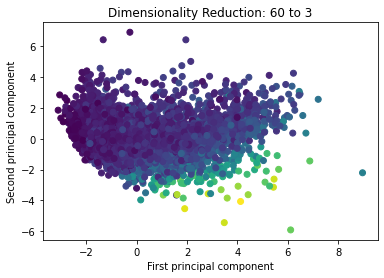

In [139]:
plt.figure()
plt.scatter(x_pca[:,0], x_pca[:,1], c = data['ConvertedComp'])
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.title('Dimensionality Reduction: 60 to 3')